# Swish-based classifier using data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [8]:
nSplits = 10
patience = 50
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelSwish', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
with open(dirLoc + 'inputPipe.pkl', 'rb') as fin:
    inputPipe = pickle.load(fin)

In [5]:
trainData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'train.hdf5', "r+"),
                                    inputPipe=inputPipe, augRotMult=16)

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 18.851s 


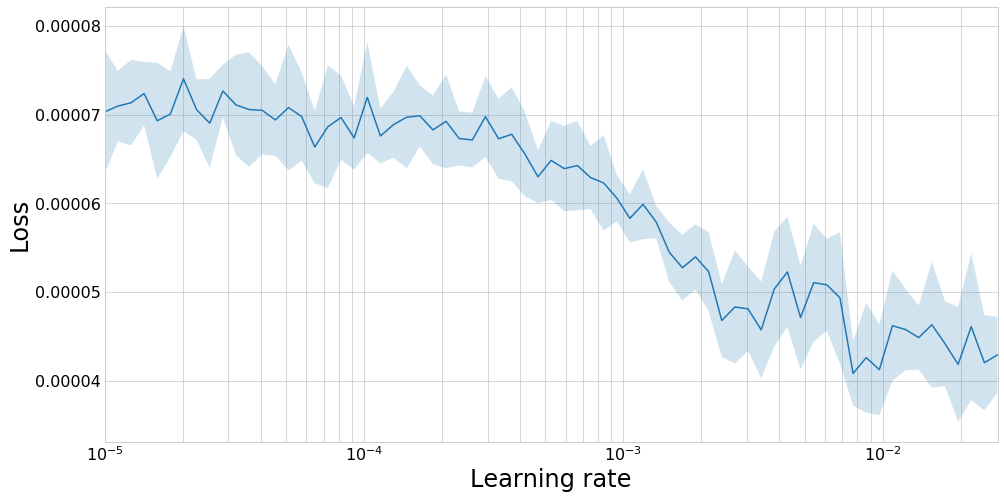

______________________________________



In [6]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 3.8123281901437687e-05
2 New best found: 3.66859606016643e-05
3 New best found: 3.5731576787974676e-05
4 New best found: 3.554584968912639e-05
5 New best found: 3.498294765630717e-05
7 New best found: 3.4276290936286274e-05
11 New best found: 3.404256099729965e-05
13 New best found: 3.395257491830847e-05
16 New best found: 3.364311513587855e-05
21 New best found: 3.329299680945458e-05
26 New best found: 3.3181727240737526e-05
32 New best found: 3.299750431362331e-05
35 New best found: 3.2952290609206654e-05
41 New best found: 3.284916090903603e-05
50 New best found: 3.266306635743947e-05
63 New best found: 3.2607648314195746e-05
68 New best found: 3.2561368154473956e-05
75 New best found: 3.2516882025882065e-05
94 New best found: 3.248772430686217e-05
96 New best found: 3.243477321706438e-05
101 New best found: 3.242555899304051e-05
105 New best found: 3.237076783180516e-05
122 New bes

41 New best found: 3.1487312832905446e-05
47 New best found: 3.135573220497463e-05
54 New best found: 3.132934949317132e-05
63 New best found: 3.132792468823027e-05
68 New best found: 3.132633666537004e-05
77 New best found: 3.121670850377996e-05
91 New best found: 3.1205364350171294e-05
95 New best found: 3.113984155934304e-05
100 New best found: 3.111273411559523e-05
108 New best found: 3.103484542662045e-05
109 New best found: 3.095898780593416e-05
Early stopping after 159 epochs
Score is: {'loss': 3.095898780593416e-05, 'wAUC': 0.060773546268738876, 'AUC': 0.0944106310747671, 'AMS': 3.63756534726534, 'cut': 0.948724627494812}
Fold took 187.263s

Running fold 8 / 10
1 New best found: 3.801635937921597e-05
2 New best found: 3.613843299746306e-05
3 New best found: 3.5419187701642126e-05
4 New best found: 3.536701181341089e-05
5 New best found: 3.51034025566735e-05
6 New best found: 3.465571749695104e-05
8 New best found: 3.435982946584891e-05
12 New best found: 3.412012351425552e-05
1

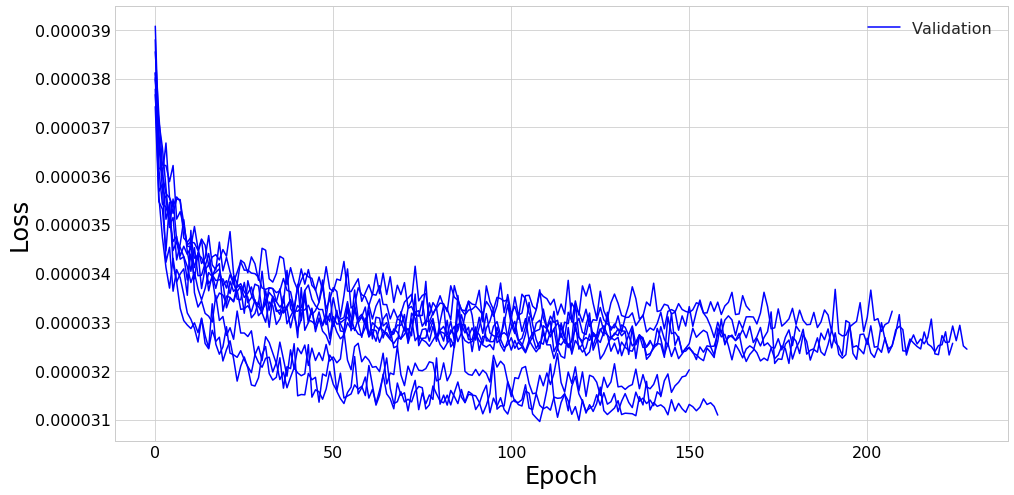

Mean loss = 3.21e-05 +- 2e-07
Mean wAUC = 0.0647 +- 0.0008
Mean AUC = 0.101 +- 0.001
Mean AMS = 3.87 +- 0.1
Mean cut = 0.964 +- 0.007
______________________________________



<Figure size 432x288 with 0 Axes>

In [9]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':2e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          patience=patience, verbose=1, amsSize=250000)

Repeating the training of 3_Model_Swish, but with data augmentation and comparing it to 5_Model_Data_Augmentation (which uses cosine annealing with restarts), we find a worse mean loss (3.21e-5 c.f. 3.18e-5) and a lower mean AMS (3.87 c.f. 3.98)

## Construct ensemble

In [10]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [11]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 6 with loss = 3.095898780593416e-05
Model 1 is 9 with loss = 3.111738440502355e-05
Model 2 is 3 with loss = 3.146861558125238e-05
Model 3 is 0 with loss = 3.21516627592261e-05
Model 4 is 4 with loss = 3.2151854589756116e-05
Model 5 is 2 with loss = 3.231118034135e-05
Model 6 is 1 with loss = 3.239473129898479e-05
Model 7 is 7 with loss = 3.258820844394506e-05
Model 8 is 5 with loss = 3.268345271644648e-05
Model 9 is 8 with loss = 3.3008211845878425e-05


## Response on validation data with TTA

In [12]:
valData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'val.hdf5', "r+"), inputPipe=inputPipe,
                                  rotate = True, reflect = True, augRotMult=8)

In [13]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.01395343033168465s per sample

Predicting batch 2 out of 10
Prediction took 0.012124897757731378s per sample

Predicting batch 3 out of 10
Prediction took 0.01179736289102584s per sample

Predicting batch 4 out of 10
Prediction took 0.012016940984688699s per sample

Predicting batch 5 out of 10
Prediction took 0.011853332254104317s per sample

Predicting batch 6 out of 10
Prediction took 0.01199635047391057s per sample

Predicting batch 7 out of 10
Prediction took 0.011954273146577179s per sample

Predicting batch 8 out of 10
Prediction took 0.011693516216240823s per sample

Predicting batch 9 out of 10
Prediction took 0.011873971642553806s per sample

Predicting batch 10 out of 10
Prediction took 0.011753417712822557s per sample



In [14]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.9026127775305154, weighted 0.9355366353430126


In [15]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.8881480285320547, 0.95098925)

In [16]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=4.0+-0.2, at mean cut of 0.96+-0.01
Exact mean cut 0.9553208400029689, corresponds to AMS of 3.795250844556858
CPU times: user 2.52 s, sys: 12.9 s, total: 15.4 s
Wall time: 2min 5s


(4.0, 0.96)

Similar to the training performance, we find worse performance when cosine annealing is not used:  overall AMS 3.89 c.f. 3.97, AMS corresponding to mean cut 3.80 c.f. 3.91.

Whilst the advantage of cosine annealing was less clear in 4_Model_Cyclical-LR, here we can clearly see the benefit.